In [2]:
import csv
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

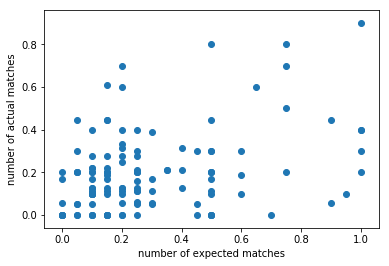

In [3]:
#Disregard this, was not used in powerpoint

csv = 'Speed Dating Data.csv'

sd_df = pd.read_csv(csv, encoding="ISO-8859-1")
sd_df.head()


#removing all the null values that do not have an expnum(expected number of matches)
sd_df[['iid', 'match', 'expnum', 'round']].head()

df_expnum = pd.DataFrame(sd_df, columns = ['iid', 'match', 'expnum', 'round']) 
df_expnum_cleaned = df_expnum[pd.notnull(df_expnum['expnum'])]
df_expnum_cleaned.head()

#sum number of actual matches divide by 20 

df_round = df_expnum_cleaned.groupby('iid')['round'].unique()
id_percentage = df_expnum_cleaned.groupby('iid')['match'].sum() / df_round
len(id_percentage)

#number of expected matches
expected_match = df_expnum_cleaned.groupby('iid')['expnum'].unique() / 20
len(expected_match)

plt.scatter(expected_match, id_percentage)
plt.ylabel('number of actual matches')
plt.xlabel('number of expected matches')

#looking at estimated matches (after meeting meeting with the people)

estimated_matches = sd_df[['iid', 'match', 'match_es', 'round']]

In [4]:
#Hanna's data cleaning

sd_csv = "Speed Dating Data.csv"
ind_df = pd.read_csv(sd_csv, encoding="ISO-8859-1")
par_df = pd.read_csv(sd_csv, encoding="ISO-8859-1")
clean_ind = ind_df.copy()
clean_ind = clean_ind[["iid","gender","pid","match","int_corr","age",
                       "field","dec","match_es", "race", "imprace"]]
clean_ind.head()
clean_par = par_df.copy()
clean_par = clean_par[["iid","gender","pid","match","int_corr","age",
                       "field","dec","match_es","race", "imprace"]]
clean_par.head()
combo_df = pd.merge(clean_ind,clean_par, left_on = 'iid',right_on='pid')
combo_df = combo_df[combo_df['pid_x'] == combo_df['iid_y']]

found = []
found_sets = []
for x, y in zip(combo_df['pid_x'], combo_df['iid_x']):
    if set([x, y]) in found_sets:
        found.append(False)
    else:
        found.append(True)
        found_sets.append(set([x, y]))
combo_df = combo_df[found]
combo_df.head()

,iid_x,gender_x,pid_x,match_x,int_corr_x,age_x,field_x,dec_x,match_es_x,race_x,...,gender_y,pid_y,match_y,int_corr_y,age_y,field_y,dec_y,match_es_y,race_y,imprace_y
0,1,0,11.0,0,0.14,21.0,Law,1,4.0,4.0,...,1,1.0,0,0.14,27.0,Finance,0,0.0,2.0,7.0
11,1,0,12.0,0,0.54,21.0,Law,1,4.0,4.0,...,1,1.0,0,0.54,22.0,Law,0,3.0,2.0,1.0
22,1,0,13.0,1,0.16,21.0,Law,1,4.0,4.0,...,1,1.0,1,0.16,22.0,Law,1,NaN,4.0,3.0
33,1,0,14.0,1,0.61,21.0,Law,1,4.0,4.0,...,1,1.0,1,0.61,23.0,Law,1,NaN,2.0,1.0
44,1,0,15.0,1,0.21,21.0,Law,1,4.0,4.0,...,1,1.0,1,0.21,24.0,Law,1,NaN,3.0,3.0


In [5]:
#getting the age diference between matches
matched = combo_df[combo_df['match_x'] == 1]
matched.head()

,iid_x,gender_x,pid_x,match_x,int_corr_x,age_x,field_x,dec_x,match_es_x,race_x,...,gender_y,pid_y,match_y,int_corr_y,age_y,field_y,dec_y,match_es_y,race_y,imprace_y
22,1,0,13.0,1,0.16,21.0,Law,1,4.0,4.0,...,1,1.0,1,0.16,22.0,Law,1,NaN,4.0,3.0
33,1,0,14.0,1,0.61,21.0,Law,1,4.0,4.0,...,1,1.0,1,0.61,23.0,Law,1,NaN,2.0,1.0
44,1,0,15.0,1,0.21,21.0,Law,1,4.0,4.0,...,1,1.0,1,0.21,24.0,Law,1,NaN,3.0,3.0
88,1,0,19.0,1,0.28,21.0,Law,1,4.0,4.0,...,1,1.0,1,0.28,28.0,money,1,NaN,2.0,1.0
133,2,0,14.0,1,-0.21,24.0,law,1,3.0,2.0,...,1,2.0,1,-0.21,23.0,Law,1,NaN,2.0,1.0


In [6]:
#There was 1380 matches, hence there are 1380 age points

age_diff = matched['age_x'] - matched['age_y']
age_diff_abs = abs(age_diff)

matched['absolute_age_diff'] = age_diff_abs
matched.head()

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,iid_x,gender_x,pid_x,match_x,int_corr_x,age_x,field_x,dec_x,match_es_x,race_x,...,pid_y,match_y,int_corr_y,age_y,field_y,dec_y,match_es_y,race_y,imprace_y,absolute_age_diff
22,1,0,13.0,1,0.16,21.0,Law,1,4.0,4.0,...,1.0,1,0.16,22.0,Law,1,NaN,4.0,3.0,1.0
33,1,0,14.0,1,0.61,21.0,Law,1,4.0,4.0,...,1.0,1,0.61,23.0,Law,1,NaN,2.0,1.0,2.0
44,1,0,15.0,1,0.21,21.0,Law,1,4.0,4.0,...,1.0,1,0.21,24.0,Law,1,NaN,3.0,3.0,3.0
88,1,0,19.0,1,0.28,21.0,Law,1,4.0,4.0,...,1.0,1,0.28,28.0,money,1,NaN,2.0,1.0,7.0
133,2,0,14.0,1,-0.21,24.0,law,1,3.0,2.0,...,2.0,1,-0.21,23.0,Law,1,NaN,2.0,1.0,1.0


In [7]:
#max value is 17, min is 0
matched['absolute_age_diff'].max()
matched['absolute_age_diff'].min()

0.0

In [8]:
#couting each age
age_counts = matched.groupby('absolute_age_diff').count()
age_counts.head()

,iid_x,gender_x,pid_x,match_x,int_corr_x,age_x,field_x,dec_x,match_es_x,race_x,...,gender_y,pid_y,match_y,int_corr_y,age_y,field_y,dec_y,match_es_y,race_y,imprace_y
absolute_age_diff,,,,,,,,,,,,,,,,,,,,,
0.0,69,69,69,69,68,69,69,69,61,69,...,69,69,69,68,69,69,69,58,69,69
1.0,141,141,141,141,141,141,141,141,117,141,...,141,141,141,141,141,141,141,108,141,141
2.0,122,122,122,122,122,122,122,122,102,122,...,122,122,122,122,122,122,122,98,122,122
3.0,92,92,92,92,92,92,92,92,76,92,...,92,92,92,92,92,92,92,74,92,92
4.0,78,78,78,78,78,78,78,78,64,78,...,78,78,78,78,78,78,78,63,78,78


count    680.000000
mean      25.800000
std        3.413307
min       19.000000
25%       23.000000
50%       25.000000
75%       28.000000
max       38.000000
Name: age_x, dtype: float64

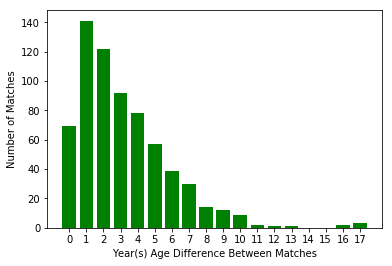

In [35]:
x_value = np.arange(0, 18, 1)

y_vals = list(age_counts['iid_x'])
y_vals.insert(14, 0)
y_vals.insert(15, 0)

plt.xlabel('Year(s) Age Difference Between Matches')
plt.ylabel('Number of Matches')

plt.bar(x_value, y_vals, color='green')
plt.xticks(x_value)

matched['age_x'].describe()


In [ ]:
print ('Looking at the chart above and the data below, it is evident that opposite ages do not attract')
print ('------------------------------------------------------------------------')
matched['absolute_age_diff'].describe()

([<matplotlib.axis.XTick at 0x12068b4e0>,
 <a list of 20 Text xticklabel objects>)

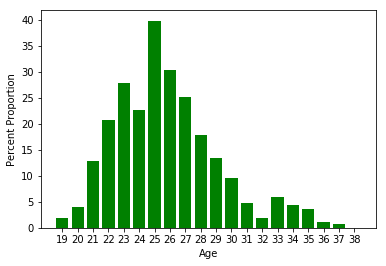

In [34]:
# Pulling averge age, and plotting distribution 

getting_average_age =  matched.groupby('age_x').count() / len(group_df['age_x']) * 100
getting_average_age.round(decimals=2)

x_vals = (np.arange(19, 39, 1))

y_vals = list(getting_average_age['iid_x'])
y_vals.insert(37, 0)

plt.bar(x_vals, y_vals, color='green')

plt.xlabel('Age')
plt.ylabel('Percent Proportion')

plt.xticks(x_vals)

As noted in the Second, people who match tend to be within similar age’s 

The first chart shoes age distribution is normally distributed, meaning the age clustering in chart one is further supported

The standard deviation shows that on average people date those 2.67 years apart. 

What we derive from this is that different ages to attract but, they still cluster with 3 years

In [11]:
#looking at race and if they attract. Checking same race
group_df = combo_df.copy()
group_df.drop_duplicates(subset ="iid_x", inplace=True)

Distribution of matches by race
------------------------------------------------------------------------
51.82% of people were European/Caucasian-American
25.91% of people were Latino/Hispanic American
9.12% of people were Asian/Pacific Islander/Asian-American
5.84% of people were Native American
5.84% of Other


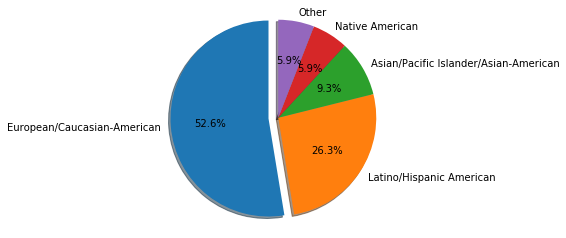

In [12]:
each_race = group_df['race_x'].value_counts() / len(group_df['race_x']) * 100
each_race_df = pd.DataFrame(each_race).reset_index()

print ('Distribution of matches by race')
print ('------------------------------------------------------------------------')
print(f'{each_race_df.loc[0,"race_x"]:.2f}% of people were European/Caucasian-American')
print(f'{each_race_df.loc[1,"race_x"]:.2f}% of people were Latino/Hispanic American')
print(f'{each_race_df.loc[2,"race_x"]:.2f}% of people were Asian/Pacific Islander/Asian-American')
print(f'{each_race_df.loc[3,"race_x"]:.2f}% of people were Native American')
print(f'{each_race_df.loc[4,"race_x"]:.2f}% of Other')

labels = 'European/Caucasian-American', 'Latino/Hispanic American', 'Asian/Pacific Islander/Asian-American', 'Native American', 'Other' 
sizes = [51.82, 25.91, 9.12, 5.84, 5.84]     
explode = (0.1, 0, 0, 0, 0)   
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
plt.show()

In [13]:
combo_df = combo_df[['race_x', 'race_y']]
combo_df['equal'] = combo_df['race_x'] == combo_df['race_y']

race_percent = combo_df['equal'].value_counts() / len(combo_df['equal']) *100

print('matches, given race')
print ('------------------------------------------------------------------------')       
print(f'{race_percent[0]:.2f}% of people matched with someone of different race')
print(f'{race_percent[1]:.2f}% of people matched with someone of same race')


matches, given race
------------------------------------------------------------------------
60.37% of people matched with someone of different race
39.63% of people matched with someone of same race


There is a greater likelihood that those of a similar age will meet with 60% of matches being with a partner of a different race.

This data is not highly reliable though, as the race distribution is skewed to European (53%) and Latinos at (26%).

This lends to the statistical significance being questionable.

Inturn no strong conclusion can be drawn from race.